In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import tweepy
import time
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# List of Target Users
target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes"]

In [5]:
# Grab 100 tweets
public_tweets = api.search(target_users, count=100, result_type="recent")
public_tweets

{'search_metadata': {'completed_in': 0.012,
  'count': 100,
  'max_id': 989200788730925056,
  'max_id_str': '989200788730925056',
  'query': '%5B%27%40BBCWorld%27%2C+%27%40CBSNews%27%2C+%27%40CNN%27%2C+%27%40FoxNews%27%2C+%27%40nytimes%27%5D',
  'refresh_url': '?since_id=989200788730925056&q=%5B%27%40BBCWorld%27%2C%20%27%40CBSNews%27%2C%20%27%40CNN%27%2C%20%27%40FoxNews%27%2C%20%27%40nytimes%27%5D&result_type=recent&include_entities=1',
  'since_id': 0,
  'since_id_str': '0'},
 'statuses': []}

In [6]:
# Variables for holding sentiments
compound_list = []
positive_list = []
neutral_list = []
negative_list = []

# Variables for dataframe
users = []
text = []
date = []
tweets_ago = []

In [7]:
# Looping through all the users
for user in target_users:
    
    # Tweet count
    tweet_count = 0

    # Get the last 100 tweets
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all the tweets
        for tweet in public_tweets:
        
            # Incrementing tweet_count
            tweet_count += 1
    
            # Adding values to list
            users.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
    
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)

In [17]:
# Creating the DataFrame
sentiment_df = pd.DataFrame({"Media Sources": users,
                             "Tweet": text, 
                             "Date": date,
                             "Compound Score": compound_list, 
                             "Positive Score": positive_list,
                             "Neutral Score": neutral_list, 
                             "Negative Score": negative_list,
                             "Tweets Ago": tweets_ago})

sentiment_df = sentiment_df[["Media Sources", "Tweet", "Date", "Compound Score", "Positive Score", "Negative Score", 
                             "Neutral Score", "Tweets Ago"]]

sentiment_df

,Media Sources,Tweet,Date,Compound Score,Positive Score,Negative Score,Neutral Score,Tweets Ago
0,@BBCWorld,Israeli policeman jailed for killing Palestini...,Wed Apr 25 17:16:16 +0000 2018,-0.8225,0.000,0.559,0.441,1
1,@BBCWorld,Swedish archaeologists reveal 5th Century mass...,Wed Apr 25 17:01:55 +0000 2018,0.0000,0.000,0.000,1.000,2
2,@BBCWorld,RT @bbcthree: No female WWE wrestlers at Saudi...,Wed Apr 25 16:37:27 +0000 2018,-0.2960,0.000,0.167,0.833,3
3,@BBCWorld,Macron to US Congress: 'There is no Planet B' ...,Wed Apr 25 16:14:26 +0000 2018,-0.2960,0.000,0.196,0.804,4
4,@BBCWorld,US college says outdoors too risky for outdoor...,Wed Apr 25 16:14:26 +0000 2018,-0.2023,0.000,0.167,0.833,5
5,@BBCWorld,Golden State Killer: Police 'arrest suspect' i...,Wed Apr 25 16:11:10 +0000 2018,-0.8360,0.000,0.597,0.403,6
6,@BBCWorld,Macron attacks nationalism in speech to US Con...,Wed Apr 25 15:58:50 +0000 2018,-0.4404,0.000,0.266,0.734,7
7,@BBCWorld,"""Iran shall never possess any nuclear weapons""...",Wed Apr 25 15:43:02 +0000 2018,-0.1265,0.113,0.136,0.751,8
8,@BBCWorld,Iran's Reza Shah: Mummified remains 'most prob...,Wed Apr 25 15:41:28 +0000 2018,0.0000,0.000,0.000,1.000,9
9,@BBCWorld,"""There is no planet B"" - French President @Emm...",Wed Apr 25 15:31:37 +0000 2018,-0.5106,0.000,0.202,0.798,10


In [9]:
# Export the data in the DataFrame into a CSV file
sentiment_df.to_csv('sentiment.csv', index=False, header=None)

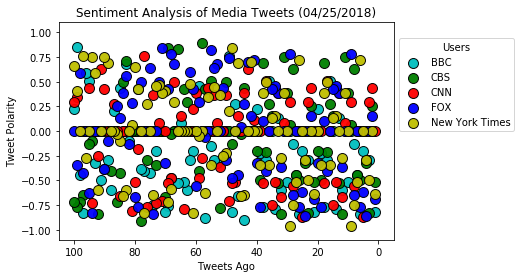

In [26]:
# Find the target users for x, y
BBC = sentiment_df.loc[sentiment_df["Media Sources"] == "@BBCWorld"]
CBS = sentiment_df.loc[sentiment_df["Media Sources"] == "@CBSNews"]
CNN = sentiment_df.loc[sentiment_df["Media Sources"] == "@CNN"]
FOX = sentiment_df.loc[sentiment_df["Media Sources"] == "@FoxNews"]
NYT = sentiment_df.loc[sentiment_df["Media Sources"] == "@nytimes"]

# Create scatter plots
plt.scatter(BBC['Tweets Ago'], BBC['Compound Score'], c='c',edgecolor='black', s=100, alpha=0.95, label='BBC')
plt.scatter(CBS['Tweets Ago'], CBS['Compound Score'], c='g',edgecolor='black', s=100, alpha=0.95, label='CBS')
plt.scatter(CNN['Tweets Ago'], CNN['Compound Score'], c='r',edgecolor='black', s=100, alpha=0.95, label='CNN')
plt.scatter(FOX['Tweets Ago'], FOX['Compound Score'], c='b',edgecolor='black', s=100, alpha=0.95, label='FOX')
plt.scatter(NYT['Tweets Ago'], NYT['Compound Score'], c='y',edgecolor='black', s=100, alpha=0.95, label='New York Times')

# Plot title and lables
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 0.95), title='Users', fontsize='medium')
plt.savefig("Sentiment Analysis of Media Tweets.png")
plt.show()

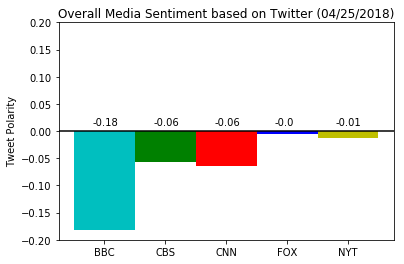

In [35]:
# Create bar chart
plt.bar(0, BBC['Compound Score'].mean(), color='c', width=1)
plt.bar(1, CBS['Compound Score'].mean(), color='g', width=1)
plt.bar(2, CNN['Compound Score'].mean(), color='r', width=1)
plt.bar(3, FOX['Compound Score'].mean(), color='b', width=1)
plt.bar(4, NYT['Compound Score'].mean(), color='y', width=1)

plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%m/%d/%Y")))
plt.ylim(-0.2, 0.2)
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, color = 'black')
x_labels = ["BBC", "CBS", "CNN", "FOX", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

for a,b in zip(np.arange(5), [BBC['Compound Score'].mean(),
                              CBS['Compound Score'].mean(), 
                              CNN['Compound Score'].mean(),
                              FOX['Compound Score'].mean(),
                              NYT['Compound Score'].mean()]):
    if b > 0:
        plt.text(a-0.2,b-b-0.015,str(round(b,2)))
    else:
        plt.text(a-0.2,b-b+0.01,str(round(b,2)))  
        
plt.savefig("Overall Media Analysis.png")
plt.show()